# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [8]:
# Write your code here
#traning
with open("stsa-train.txt") as txtf:
    mylist = [line.rstrip('\n') for line in txtf]
    
Label = []
Text = []

for i, line in enumerate(mylist):
    label = mylist[i][0]
    tex = mylist[i][1:]
    Label.append(label)
    Text.append(tex)

data01 = pd.DataFrame(list(zip(Label, Text)),columns =['Number', 'ReviewText'])
data01.head()


,Number,ReviewText
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [9]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
#Cleaning
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data01['ReviewTextClean']=data01['ReviewText'].map(lambda s:preprocess(s)) 
data01.head()

,Number,ReviewText,ReviewTextClean
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby end modern office ano...


In [12]:
#Testing
with open("stsa-test.txt") as txtf:
    mylist_test = [line.rstrip('\n') for line in txtf]
    
labeltest = []
texttest = []

for i, line in enumerate(mylist_test):
    label_test = mylist_test[i][0]
    tex_test = mylist_test[i][1:]
    labeltest.append(label_test)
    texttest.append(tex_test)

data02 = pd.DataFrame(list(zip(labeltest, texttest)),columns =['Number', 'ReviewText'])
data02.head()

,Number,ReviewText
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


In [13]:
#Cleaning

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")  
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data02['ReviewTextClean']=data02['ReviewText'].map(lambda s:preprocess(s)) 
data02.head()

,Number,ReviewText,ReviewTextClean
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


In [14]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer 

In [15]:
tfidfvectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
traintfidf = tfidfvectorizer.fit_transform(data01["ReviewTextClean"]).toarray()
testtfidf = tfidfvectorizer.transform(data02["ReviewTextClean"]).toarray()

xtest = testtfidf
ytest = data02["Number"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:


x_train, x_valid, y_train, y_valid = train_test_split(traintfidf,data01["Number"],test_size = 0.2, random_state = 202)

In [16]:
#MultinominalNB

from sklearn.naive_bayes import MultinomialNB


In [17]:
Class = MultinomialNB()
Model01 = Class.fit(x_train, y_train) 
predictionsvalidationset = Class.predict(x_valid) 


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print ("Accuracy of MultinomialNB validation set is : ", round(accuracy_score(y_valid, predictionsvalidationset)*100),"%")
print ("Percision of MultinomialNB validation set is : ", round(precision_score(y_valid, predictionsvalidationset, pos_label='0')*100),"%")
print ("Recall of MultinomialNB validation set is : ", round(recall_score(y_valid, predictionsvalidationset, pos_label='0')*100),"%")
print ("F1 Score of MultinomialNB validation set is : ", round(f1_score(y_valid, predictionsvalidationset, pos_label='0')*100),"%")

Accuracy of MultinomialNB validation set is :  78 %
Percision of MultinomialNB validation set is :  83 %
Recall of MultinomialNB validation set is :  69 %
F1 Score of MultinomialNB validation set is :  76 %


In [18]:
from sklearn.metrics import classification_report

In [19]:


naivevalidation = classification_report(y_valid, predictionsvalidationset)
print("Classification: ", "\n", "\n",naivevalidation)

Classification:  
 
               precision    recall  f1-score   support

           0       0.83      0.69      0.76       667
           1       0.75      0.87      0.81       717

    accuracy                           0.78      1384
   macro avg       0.79      0.78      0.78      1384
weighted avg       0.79      0.78      0.78      1384



In [20]:
from sklearn.model_selection import cross_val_score

In [21]:

accuraciesvalidation = cross_val_score(estimator = Class, X = x_train, y = y_train, cv = 10)

print(f"Naive Bayes Model 10-fold cross validation training set is :  {round(accuraciesvalidation.mean()*100)}%")

Naive Bayes Model 10-fold cross validation training set is :  77%


In [22]:
predictionstestset = Class.predict(xtest) 
print ("Accuracy is : ", round(accuracy_score(ytest, predictionstestset)*100),"%")
print ("Percision is : ", round(precision_score(ytest, predictionstestset, pos_label='0')*100),"%")
print ("Recall is : ", round(recall_score(ytest, predictionstestset, pos_label='0')*100),"%")
print ("F1 Score is : ", round(f1_score(ytest, predictionstestset, pos_label='0')*100),"%")

Accuracy is :  79 %
Percision is :  86 %
Recall is :  71 %
F1 Score is :  78 %


In [23]:
naivetest = classification_report(ytest, predictionstestset)
print("Classification: ", "\n", "\n",naivetest)

Classification:  
 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78       912
           1       0.75      0.88      0.81       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



In [24]:
accuraciestest = cross_val_score(estimator = Class, X = xtest, y = ytest, cv = 10)

print(f"Naive Bayes Model 10-fold cross validation testing set is :  {round(accuraciestest.mean()*100)}%")

Naive Bayes Model 10-fold cross validation testing set is :  73%


In [18]:
#SVM


from sklearn import svm

In [19]:
classsvm = svm.SVC()
Modelsvm = classsvm.fit(x_train, y_train) 
svmpredictionsvalidationset = classsvm.predict(x_valid) 

print ("Accuracy is : ", round(accuracy_score(y_valid, svmpredictionsvalidationset)*100),"%")
print ("Percision is : ", round(precision_score(y_valid, svmpredictionsvalidationset, pos_label='0')*100),"%")
print ("Recall is : ", round(recall_score(y_valid, svmpredictionsvalidationset, pos_label='0')*100),"%")
print ("F1 Score is : ", round(f1_score(y_valid, svmpredictionsvalidationset, pos_label='0')*100),"%")

Accuracy is :  79 %
Percision is :  79 %
Recall is :  76 %
F1 Score is :  77 %


In [21]:
from sklearn.metrics import classification_report

svmvalidation = classification_report(y_valid, svmpredictionsvalidationset)
print("Classification: ", "\n", "\n",svmvalidation)

Classification:  
 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       667
           1       0.78      0.82      0.80       717

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [22]:
from sklearn.model_selection import cross_val_score

In [23]:

svmaccuraciesvalidation = cross_val_score(estimator = classsvm, X = x_train, y = y_train, cv = 10)

print(f"SVM Model 10-fold cross validation training set is :  {round(svmaccuraciesvalidation.mean()*100)}%")

SVM Model 10-fold cross validation training set is :  77%


In [24]:
svmpredictionstestset = classsvm.predict(xtest) 
print ("Accuracy SVM model is : ", round(accuracy_score(ytest, svmpredictionstestset)*100),"%")
print ("Percision SVM model is : ", round(precision_score(ytest, svmpredictionstestset, pos_label='0')*100),"%")
print ("Recall SVM model is : ", round(recall_score(ytest, svmpredictionstestset, pos_label='0')*100),"%")
print ("F1 Score SVM model is : ", round(f1_score(ytest, svmpredictionstestset, pos_label='0')*100),"%")

Accuracy SVM model is :  79 %
Percision SVM model is :  82 %
Recall SVM model is :  75 %
F1 Score SVM model is :  78 %


In [25]:
svmtest = classification_report(ytest, svmpredictionstestset)
print("Classification: ", "\n", "\n",svmtest)

Classification:  
 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       912
           1       0.77      0.84      0.80       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



In [26]:
svmaccuraciestest = cross_val_score(estimator = classsvm, X = xtest, y = ytest, cv = 10)

print(f"SVM Model 10-fold cross validation testing set is :  {round(svmaccuraciestest.mean()*100)}%")

SVM Model 10-fold cross validation testing set is :  72%


In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [35]:


classknn = KNeighborsClassifier(n_neighbors = 15)
modelknn = classknn.fit(x_train, y_train) 
knnpredictionsvalidationset = classknn.predict(x_valid) 

print ("Accuracy of KNN model is : ", round(accuracy_score(y_valid, knnpredictionsvalidationset)*100),"%")
print ("Percision of KNN model is : ", round(precision_score(y_valid, knnpredictionsvalidationset, pos_label='0')*100),"%")
print ("Recall of KNN model is : ", round(recall_score(y_valid, knnpredictionsvalidationset, pos_label='0')*100),"%")
print ("F1 Score of KNN model is : ", round(f1_score(y_valid, knnpredictionsvalidationset, pos_label='0')*100),"%")


Accuracy of KNN model is :  74 %
Percision of KNN model is :  71 %
Recall of KNN model is :  78 %
F1 Score of KNN model is :  75 %


In [36]:
from sklearn.metrics import classification_report

In [37]:


knnvalidation = classification_report(y_valid, knnpredictionsvalidationset)
print("Classification: ", "\n", "\n",knnvalidation)

Classification:  
 
               precision    recall  f1-score   support

           0       0.71      0.78      0.75       667
           1       0.78      0.71      0.74       717

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384



In [38]:
from sklearn.model_selection import cross_val_score

In [40]:

knnaccuraciesvalidation = cross_val_score(estimator = classknn, X = x_train, y = y_train, cv = 10)

print(f"KNN Model 10-fold cross validation training set is :  {round(knnaccuraciesvalidation.mean()*100)}%")

KNN Model 10-fold cross validation training set is :  71%


In [41]:
knnpredictionstest = classknn.predict(xtest) 
print ("Accuracy of KNN model is : ", round(accuracy_score(ytest, knnpredictionstest)*100),"%")
print ("Percision of KNN model is : ", round(precision_score(ytest, knnpredictionstest, pos_label='0')*100),"%")
print ("Recall of KNN model is : ", round(recall_score(ytest, knnpredictionstest, pos_label='0')*100),"%")
print ("F1 Score of KNN model is : ", round(f1_score(ytest, knnpredictionstest, pos_label='0')*100),"%")

Accuracy of KNN model is :  73 %
Percision of KNN model is :  71 %
Recall of KNN model is :  77 %
F1 Score of KNN model is :  74 %


In [42]:
knntest = classification_report(ytest, knnpredictionstest)
print("Classification: ", "\n", "\n",knntest)

Classification:  
 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       912
           1       0.75      0.69      0.72       909

    accuracy                           0.73      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.73      0.73      0.73      1821



In [43]:
knnaccuraciestest = cross_val_score(estimator = classknn, X = xtest, y = ytest, cv = 10)

print(f"KNN Model 10-fold cross validation score on testing set is :  {round(knnaccuraciestest.mean()*100)}%")

KNN Model 10-fold cross validation score on testing set is :  63%


In [44]:
#Decison Tree

from sklearn.tree import DecisionTreeClassifier

In [45]:


classdet = DecisionTreeClassifier()
Modeldet = classdet.fit(x_train, y_train) 
DecisionTreePredictionsValidationSet = classdet.predict(x_valid) 

print ("Accuracy of the Decison Tree is : ", round(accuracy_score(y_valid, DecisionTreePredictionsValidationSet)*100),"%")
print ("Percision of the Decison Tree is : ", round(precision_score(y_valid, DecisionTreePredictionsValidationSet, pos_label='0')*100),"%")
print ("Recall of the Decison Tree is : ", round(recall_score(y_valid, DecisionTreePredictionsValidationSet, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree is : ", round(f1_score(y_valid, DecisionTreePredictionsValidationSet, pos_label='0')*100),"%")

Accuracy of the Decison Tree is :  66 %
Percision of the Decison Tree is :  63 %
Recall of the Decison Tree is :  71 %
F1 Score of the Decison Tree is :  67 %


In [46]:
from sklearn.metrics import classification_report

cr_dt_validation = classification_report(y_valid, DecisionTreePredictionsValidationSet)
print("Classification Report: ", "\n", "\n",cr_dt_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       667
           1       0.69      0.61      0.65       717

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



In [47]:
from sklearn.model_selection import cross_val_score
dtAccuraciesValidation = cross_val_score(estimator = classdet, X = x_train, y = y_train, cv = 10)

print(f"Decison Tree Classifier Model validation score is :  {round(dtAccuraciesValidation.mean()*100)}%")

Decison Tree Classifier Model validation score is :  65%


In [49]:
dtPredictionsTestSet = classdet.predict(xtest) 
print ("Accuracy of the Decison Tree Classifier is : ", round(accuracy_score(ytest, dtPredictionsTestSet)*100),"%")
print ("Percision of the Decison Tree Classifier is : ", round(precision_score(ytest, dtPredictionsTestSet, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier is :", round(recall_score(ytest, dtPredictionsTestSet, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier is : ", round(f1_score(ytest, dtPredictionsTestSet, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier is :  67 %
Percision of the Decison Tree Classifier is :  66 %
Recall of the Decison Tree Classifier is : 71 %
F1 Score of the Decison Tree Classifier is :  68 %


In [51]:
CrDeTest = classification_report(ytest, dtPredictionsTestSet)
print("Classification: ", "\n", "\n",CrDeTest)

Classification:  
 
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       912
           1       0.68      0.63      0.65       909

    accuracy                           0.67      1821
   macro avg       0.67      0.67      0.67      1821
weighted avg       0.67      0.67      0.67      1821



In [52]:
DetAccuraciesTest = cross_val_score(estimator = classdet, X = xtest, y = ytest, cv = 10)

print(f"Decison Tree Classifier Model 10-fold cross validation testing set is :  {round(DetAccuraciesTest.mean()*100)}%")

Decison Tree Classifier Model 10-fold cross validation testing set is :  62%


In [53]:
#Randomforest

from sklearn.ensemble import RandomForestClassifier

In [54]:


ClassifierRaf = RandomForestClassifier()
ModelRf = ClassifierRaf.fit(x_train, y_train) 
RafPredictionsValidationSet = ClassifierRaf.predict(x_valid) 

print ("Accuracy of the Random Forest validation set is : ", round(accuracy_score(y_valid, RafPredictionsValidationSet)*100),"%")
print ("Percision of the Random Forest validation set is : ", round(precision_score(y_valid, RafPredictionsValidationSet, pos_label='0')*100),"%")
print ("Recall of the Random Forest validation set is : ", round(recall_score(y_valid, RafPredictionsValidationSet, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest validation set is : ", round(f1_score(y_valid, RafPredictionsValidationSet, pos_label='0')*100),"%")

Accuracy of the Random Forest validation set is :  72 %
Percision of the Random Forest validation set is :  71 %
Recall of the Random Forest validation set is :  73 %
F1 Score of the Random Forest validation set is :  72 %


In [56]:


CrRafValidation = classification_report(y_valid, RafPredictionsValidationSet)
print("Classification: ", "\n", "\n",CrRafValidation)

Classification:  
 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       667
           1       0.74      0.72      0.73       717

    accuracy                           0.72      1384
   macro avg       0.72      0.72      0.72      1384
weighted avg       0.72      0.72      0.72      1384



In [57]:

RfAccuraciesValidation = cross_val_score(estimator = ClassifierRaf, X = x_train, y = y_train, cv = 10)

print(f"Decison Random Forest Model 10-fold cross validation training set is :  {round(RfAccuraciesValidation.mean()*100)}%")

Decison Random Forest Model 10-fold cross validation training set is :  72%


In [60]:
RafPredictionsTestSet = ClassifierRaf.predict(xtest) 
print ("Accuracy of the Random Forest is : ", round(accuracy_score(ytest, RafPredictionsTestSet)*100),"%")
print ("Percision of the Random Forest is : ", round(precision_score(ytest, RafPredictionsTestSet, pos_label='0')*100),"%")
print ("Recall of the Random Forest is : ", round(recall_score(ytest, RafPredictionsTestSet, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest is : ", round(f1_score(ytest, RafPredictionsTestSet, pos_label='0')*100),"%")

Accuracy of the Random Forest is :  74 %
Percision of the Random Forest is :  73 %
Recall of the Random Forest is :  77 %
F1 Score of the Random Forest is :  75 %


In [62]:
CrRafTest = classification_report(ytest, RafPredictionsTestSet)
print("Classification Report: ", "\n", "\n",CrRafTest)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       912
           1       0.76      0.72      0.74       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



In [63]:
RafAccuraciesTest = cross_val_score(estimator = ClassifierRaf, X = xtest, y = ytest, cv = 10)

print(f"Random Forest Classifier Model 10-fold cross validation testing set is :  {round(RafAccuraciesTest.mean()*100)}%")

Random Forest Classifier Model 10-fold cross validation testing set is :  65%


In [64]:
#XGBoost

from xgboost import XGBClassifier

In [66]:
ClassXG = XGBClassifier()
ModelXG = ClassXG.fit(x_train, y_train) 
XGPredictionsValidationSet = ClassXG.predict(x_valid) 

print ("Accuracy of the XGBoost Classifieris : ", round(accuracy_score(y_valid, XGPredictionsValidationSet)*100),"%")
print ("Percision of the XGBoost Classifier is : ", round(precision_score(y_valid, XGPredictionsValidationSet, pos_label='0')*100),"%")
print ("Recall of the XGBoost Classifier is : ", round(recall_score(y_valid, XGPredictionsValidationSet , pos_label='0')*100),"%")
print ("F1 Score of the XGBoost Classifier is : ", round(f1_score(y_valid, XGPredictionsValidationSet, pos_label='0')*100),"%")

Accuracy of the XGBoost Classifieris :  62 %
Percision of the XGBoost Classifier is :  68 %
Recall of the XGBoost Classifier is :  40 %
F1 Score of the XGBoost Classifier is :  50 %


In [67]:
CrXGValidation = classification_report(y_valid, XGPredictionsValidationSet)
print("Classification: ", "\n", "\n",CrXGValidation)

Classification:  
 
               precision    recall  f1-score   support

           0       0.68      0.40      0.50       667
           1       0.60      0.83      0.69       717

    accuracy                           0.62      1384
   macro avg       0.64      0.61      0.60      1384
weighted avg       0.64      0.62      0.60      1384



In [68]:
XGAccuraciesValidation = cross_val_score(estimator = ClassXG, X = x_train, y = y_train, cv = 10)

print(f"XGBoost Model 10-fold cross validation training set is :  {round(XGAccuraciesValidation.mean()*100)}%")

XGBoost Model 10-fold cross validation training set is :  63%


In [69]:
XGPredictionsTest = ClassXG.predict(xtest) 
print ("Accuracy of the XGBoost Classifier is : ", round(accuracy_score(ytest, XGPredictionsTest)*100),"%")
print ("Percision of the XGBoost Classifier is : ", round(precision_score(ytest, XGPredictionsTest, pos_label='0')*100),"%")
print ("Recall of the XGBoost Classifier is : ", round(recall_score(ytest, XGPredictionsTest, pos_label='0')*100),"%")
print ("F1 Score of the XGBoost Classifier is : ", round(f1_score(ytest, XGPredictionsTest, pos_label='0')*100),"%")

Accuracy of the XGBoost Classifier is :  64 %
Percision of the XGBoost Classifier is :  74 %
Recall of the XGBoost Classifier is :  45 %
F1 Score of the XGBoost Classifier is :  56 %


In [70]:
CrXGTest = classification_report(ytest, XGPredictionsTest)
print("Classification: ", "\n", "\n",CrXGTest)

Classification:  
 
               precision    recall  f1-score   support

           0       0.74      0.45      0.56       912
           1       0.60      0.84      0.70       909

    accuracy                           0.64      1821
   macro avg       0.67      0.64      0.63      1821
weighted avg       0.67      0.64      0.63      1821



In [71]:
XGAccuraciesTest = cross_val_score(estimator = ClassXG, X = xtest, y = ytest, cv = 10)

print(f"XGBoost Classifier Model 10-fold cross validation testing set is :  {round(XGAccuraciesTest.mean()*100)}%")

XGBoost Classifier Model 10-fold cross validation testing set is :  62%


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [27]:
#Write your code here.

Data = pd.read_csv('/content/Amazon_Unlocked_Mobile - Copy.csv')

Data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
13287,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,1,"Do not buy this phone. it is used, no head pho...",0.0
13288,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,1,Bad batery,0.0
13289,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,3,The phone works ..not sure if its unlocked to ...,0.0
13290,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,5,"Delivered as promised, excellent condition, wo...",0.0


In [28]:
Data['Reviews']=Data['Reviews'].map(lambda s:preprocess(s)) 
Data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone used hard phone li...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0


Text(0, 0.5, 'WCSS')

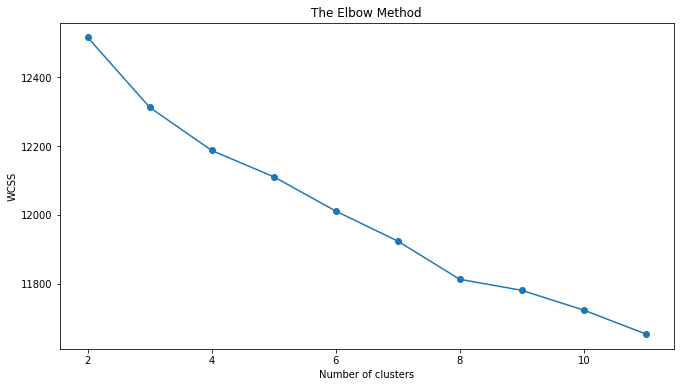

In [29]:
# TF-IDF 

from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVect = TfidfVectorizer()
tfidf_vects = TfidfVect.fit_transform(Data['Reviews'].values.astype('U'))
Names= TfidfVect.get_feature_names()

## elbow model

from sklearn.cluster import KMeans
wcss = []
for i in range(2,12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 101)
    kmeans.fit(tfidf_vects)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (11,6))
plt.plot(range(2,12), wcss, marker = "o")
plt.title ("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [30]:
# 4 clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4,init='k-means++',max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({0: 543, 1: 253, 2: 883, 3: 11613})

In [31]:
top_words = 7
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(4):
    key_features = [Names[i] for i in centroids[cluster_num, :top_words]]
    print('Cluster '+str(cluster_num+1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['good', 'phone', 'product', 'far', 'works', 'condition', 'price']
Cluster 2
Top Words: ['excellent', 'product', 'condition', 'recommend', 'thank', 'seller', 'phone']
Cluster 3
Top Words: ['great', 'works', 'phone', 'price', 'product', 'condition', 'love']
Cluster 4
Top Words: ['phone', 'iphone', 'good', 'love', 'new', 'work', 'like']


In [32]:
ClusterCenter=model.cluster_centers_
ClusterCenter

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.11058922e-06, 2.47543485e-05, 2.52701725e-04, ...,
        3.23334818e-05, 2.90059312e-05, 2.90059312e-05]])

In [33]:
#DBSCAN

reviews=[]
for i in Data['Reviews']:
    reviews.append(str(i).split())
import gensim
w2v_model=gensim.models.Word2Vec(reviews, size=100, workers=4)

import numpy as np
vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
Vectors = np.array(vectors)
Vectors = np.nan_to_num(vectors)

In [34]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
    
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

   
    return dists[199]

Vectors.shape

(13292, 100)

In [35]:

twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

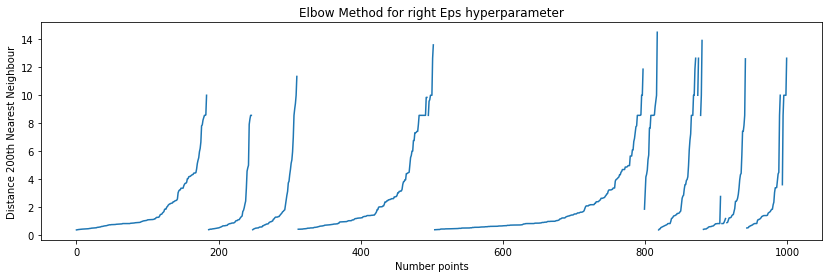

In [39]:
# Plotting 
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number points")
plt.ylabel("Distance 200th Nearest Neighbour")
plt.show()

In [42]:
#Model
ModelD = DBSCAN(eps = 5, min_samples = minPts)
ModelD.fit(Vectors)

DBSCAN(eps=5, min_samples=200)

In [43]:
DataD = Data
DataD["DBS Cluster Label"] = ModelD.labels_
DataD

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,DBS Cluster Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone used hard phone li...,1.0,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,0
...,...,...,...,...,...,...,...
13287,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,1,buy phone used head phone chip charger origina...,0.0,0
13288,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,1,bad batery,0.0,0
13289,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,3,phone works sure unlocked work carrier unlocke...,0.0,0
13290,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,5,delivered promised excellent condition works l...,0.0,0


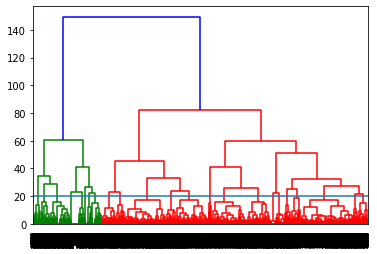

In [47]:
#Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(Vectors,method='ward'))
plt.axhline(y=20)

In [48]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  #took n=3 from dendrogram curve 
Agg=cluster.fit_predict(Vectors)

In [49]:
DataD['AVG-W2V Clus Label'] = cluster.labels_
DataD.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,DBS Cluster Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone used hard phone li...,1.0,0,2
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,0,2
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0,0,2
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0,0,2
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,0,1


In [51]:
HierData = Data 
HierData["hierarchial cluster labels"] = cluster.labels_
HierData.groupby(["hierarchial cluster labels"])["Reviews"].count()

hierarchial cluster labels
0    2721
1    6329
2    4242
Name: Reviews, dtype: int64

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)



The Hierarchical clustering method properly clusters the reviews in such a way that you can select at which stage with which detail you want to see results. The Hierarchical clustering method provides a better results than two other methods and makes us efficient and gives us more degree of freedom to select number of clusters. However, the other two methods do not follow this concept. KMean we have to identify the number of clusters and we cannot see the relationships between a set of clusters. Also, DBSCAN is limited to an assumption that limits the outcomes. DBSCAN is a density-based clustering algorithm and assumes that density exists in data.